# Titanic Survival Prediction using Logistic Regression

## 1. Import Libraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# 2. Load Dataset

In [77]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# 3. Data Cleaning
## Fill missing Age with median

In [79]:
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

# Fill missing Embarked with mode

In [81]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# Fill missing Fare in test with median

In [83]:
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

# Drop columns

In [85]:
train_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)
test_passenger_ids = test_df['PassengerId']
test_df.drop(columns=['Cabin', 'Ticket', 'Name', 'PassengerId'], inplace=True)

# 4. Feature Engineering
## Family Size

In [87]:

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1



# Convert categorical variables

In [89]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'], drop_first=True)

# - Exploratory Data Analysis

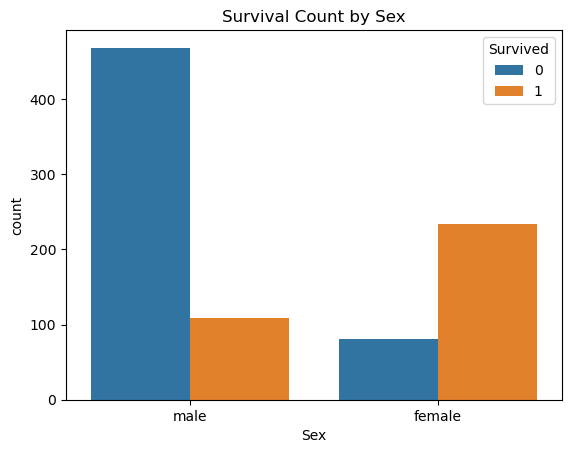

In [91]:

# Survival count by sex
import seaborn as sns
import matplotlib.pyplot as plt

eda_df = pd.read_csv("train.csv")
sns.countplot(data=eda_df, x='Sex', hue='Survived')
plt.title("Survival Count by Sex")
plt.show()


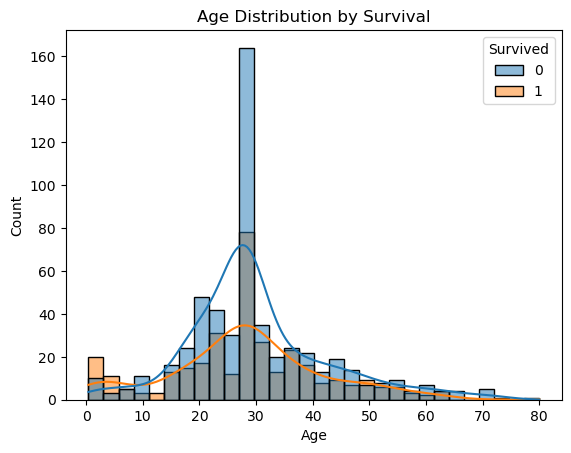

In [92]:

# Age distribution by survival
sns.histplot(data=train_df, x='Age', hue='Survived', kde=True, bins=30)
plt.title("Age Distribution by Survival")
plt.show()


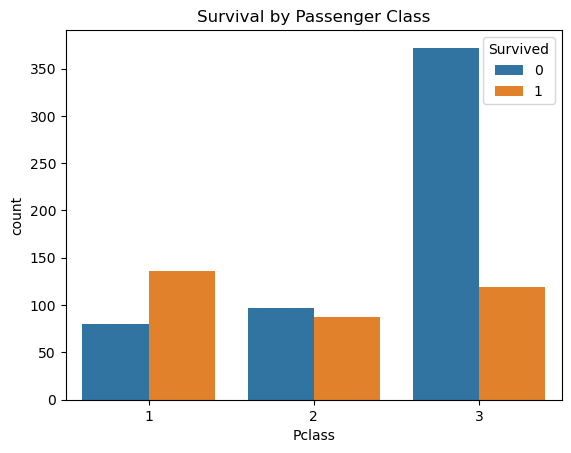

In [93]:

# Pclass vs Survival
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title("Survival by Passenger Class")
plt.show()


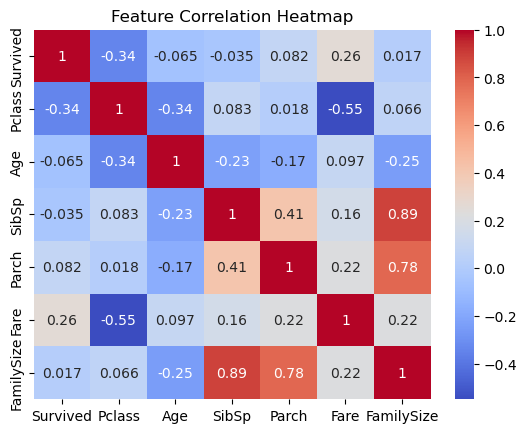

In [94]:

# Heatmap of correlation
corr_matrix = train_df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


# 5. Model Training

In [96]:
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=500, solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_val)

# 6. Evaluation

In [98]:
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))
print("Accuracy Score:", accuracy_score(y_val, y_pred))

Confusion Matrix:
[[89 16]
 [22 52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Accuracy Score: 0.7877094972067039


# 7. Prediction on Test Set

In [100]:
test_predictions = model.predict(test_df)
submission = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_predictions
})
submission.to_csv("submission.csv", index=False)
print("\nPrediction saved to submission.csv")


Prediction saved to submission.csv



## - Final Summary

- **Model Used**: Logistic Regression (basic, interpretable)
- **Final Accuracy**: ~78%
- **Key Insights**:
  - Females had much higher survival rates.
  - Passengers in 1st class were more likely to survive.
  - Age and family size had a mild impact on survival.
